1. Buat model Deep learning (PyTorch and Tensorflow).
2. Bandingkan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Matriks Evaluasi mana yang terbaik? Jelaskan!
3. Beri penjelasan untuk setiap persamaan matematika yang ada.

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('income.csv')

# Drop missing values
df = df.dropna()

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Define features and target
X = df.drop(columns=['income'])
y = df['income']


In [ ]:
# Ensure target values are binary (0 and 1)
y = (y > 0).astype(int)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# Create DataLoader for PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define PyTorch Model
class IncomeClassifier(nn.Module):
    def __init__(self, input_dim):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [ ]:
# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = IncomeClassifier(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Train PyTorch Model
num_epochs = 20
losses = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/20, Loss: 0.6176
Epoch 2/20, Loss: 0.6047
Epoch 3/20, Loss: 0.6008
Epoch 4/20, Loss: 0.5988
Epoch 5/20, Loss: 0.5970
Epoch 6/20, Loss: 0.5957
Epoch 7/20, Loss: 0.5945
Epoch 8/20, Loss: 0.5934
Epoch 9/20, Loss: 0.5949
Epoch 10/20, Loss: 0.5917
Epoch 11/20, Loss: 0.5910
Epoch 12/20, Loss: 0.5903
Epoch 13/20, Loss: 0.5895
Epoch 14/20, Loss: 0.5890
Epoch 15/20, Loss: 0.5875
Epoch 16/20, Loss: 0.5869
Epoch 17/20, Loss: 0.5866
Epoch 18/20, Loss: 0.5859
Epoch 19/20, Loss: 0.5851
Epoch 20/20, Loss: 0.5848


In [ ]:
# Evaluate PyTorch Model
model.eval()
y_pred_torch = []
y_true_torch = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X).squeeze()
        predicted = (outputs > 0.5).int()
        y_pred_torch.extend(predicted.numpy())
        y_true_torch.extend(batch_y.numpy())

accuracy_torch = accuracy_score(y_true_torch, y_pred_torch)
precision_torch = precision_score(y_true_torch, y_pred_torch)
recall_torch = recall_score(y_true_torch, y_pred_torch)
f1_torch = f1_score(y_true_torch, y_pred_torch)
auc_torch = roc_auc_score(y_true_torch, y_pred_torch)

print(f"PyTorch - Accuracy: {accuracy_torch:.4f}, Precision: {precision_torch:.4f}, Recall: {recall_torch:.4f}, F1-Score: {f1_torch:.4f}, AUC: {auc_torch:.4f}")


PyTorch - Accuracy: 0.6686, Precision: 0.6888, Recall: 0.5671, F1-Score: 0.6221, AUC: 0.6648


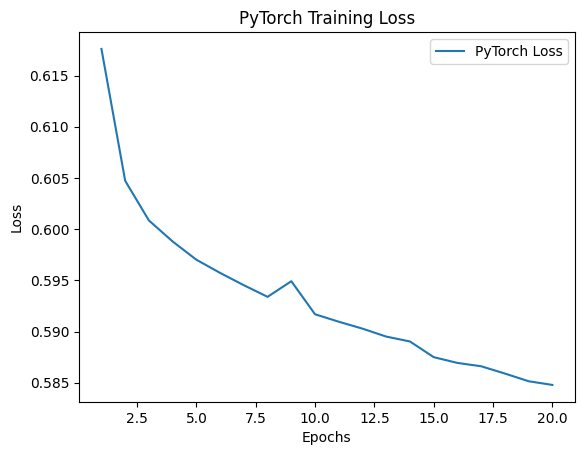

In [ ]:

# Plot PyTorch Training Loss
plt.figure()
plt.plot(range(1, num_epochs + 1), losses, label='PyTorch Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training Loss')
plt.legend()
plt.show()


In [ ]:
# Build TensorFlow Model
model_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile TensorFlow Model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train TensorFlow Model
history = model_tf.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6329 - loss: 0.6334 - val_accuracy: 0.6606 - val_loss: 0.6077
Epoch 2/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6648 - loss: 0.6032 - val_accuracy: 0.6655 - val_loss: 0.6028
Epoch 3/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6669 - loss: 0.6008 - val_accuracy: 0.6672 - val_loss: 0.6020
Epoch 4/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6692 - loss: 0.5980 - val_accuracy: 0.6660 - val_loss: 0.6016
Epoch 5/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6750 - loss: 0.5958 - val_accuracy: 0.6637 - val_loss: 0.6028
Epoch 6/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6724 - loss: 0.5941 - val_accuracy: 0.6673 - val_loss: 0.6001
Epoch 7/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6734 - loss: 0.5940 - val_accuracy: 0.6664 - val_loss: 0.6011
Epoch 8/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6728 - loss: 0.5921 - 

In [ ]:
# Evaluate TensorFlow Model
y_pred_tf = (model_tf.predict(X_test) > 0.5).astype("int32")
accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)
auc_tf = roc_auc_score(y_test, y_pred_tf)

print(f"TensorFlow - Accuracy: {accuracy_tf:.4f}, Precision: {precision_tf:.4f}, Recall: {recall_tf:.4f}, F1-Score: {f1_tf:.4f}, AUC: {auc_tf:.4f}")


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TensorFlow - Accuracy: 0.6668, Precision: 0.7151, Recall: 0.5106, F1-Score: 0.5958, AUC: 0.6610


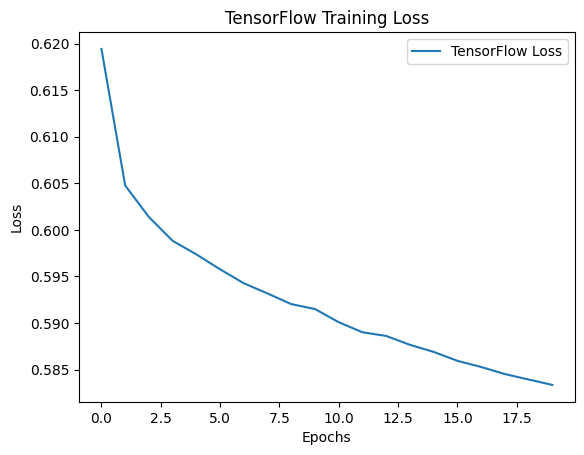

In [ ]:
# Plot TensorFlow Training Loss
plt.figure()
plt.plot(history.history['loss'], label='TensorFlow Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('TensorFlow Training Loss')
plt.legend()
plt.show()


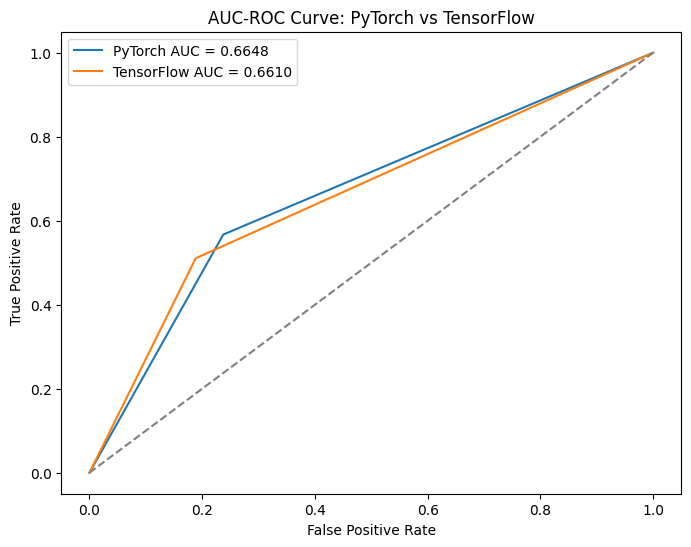

In [ ]:
# Plot AUC-ROC Curve
from sklearn.metrics import roc_curve # Import roc_curve
fpr_torch, tpr_torch, _ = roc_curve(y_true_torch, y_pred_torch)
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_tf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_torch, tpr_torch, label=f'PyTorch AUC = {auc_torch:.4f}')
plt.plot(fpr_tf, tpr_tf, label=f'TensorFlow AUC = {auc_tf:.4f}')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve: PyTorch vs TensorFlow')
plt.legend()
plt.show()


#Perbandingan Matriks Evaluasi

berdasarkan hasil evaluasi model diatas, didapatkan bahwa pada matriks akurasi model PyTorch sedikit lebih baik 66.86% daripada Tensorflow 66.68% dengan selisih yang sangat kecil. pada presisi untuk model Tensorflow lebih baik 71.51% dimana lebih akurat dalam mengklasifikasi kelas positif (income > 50k). untuk recall pada model PyTorch lebih baik 56.71% dimana lebih baik dalam menangkap case income > 50k daripada model Tensorflow. untuk F1-Score pada model PyTorch 62.21% karena memiliki keseimbangan yang baik antara presisi dan recall. untuk AUC-ROC model PyTorch lebih baik 66.48% yang menunjukan model ini cukup baik dalam membedakan antara dua kelas.

#Analisis Grafik Training Loss

berdasarkan 2 buah grafik training loss sebelumnya, menunjukkan bahwa grafik loss PyTorch (loss awal = 0.6167 dan loass akhir = 0.5848) stabil dengan penurunan loss melambat setelah beberapa epoch, sedangkan grafik loss Tensorflow (loss awal - 0.6334 dan loss akhir= 0.6032)  dimana konvergensi lebih cepat daripada PyTorch tetapi loss akhir tetap masih lebih tinggi. dapat disimpulkan bahwa model PyTorch mengalami penuruna loss yang stabil dengan akhir yang rendah sedangkan Tensorflow lebih cepat pada penurunan di awal tetapi loss akhir yang lebih tinggi daripada PyTorch dikarenakan bisa jadi mengalami overfitting dan belum optimal dalam generalisasi.

#Analisis Grafik AUC-ROC

berdasarkan grafik AUC-ROC sebelumnya, pada sumbu-x merupakan False Positive Rate (FPR = FP / (FP+TN)) dimana semakin kecil FPR maka semakin baik model dalam menghindari kesalahan klasifikasi kelas  income ≤50K sebagai income >50K. sedangkan sumbu-y merupakan True Positive Rate ( TPR = TP/ (TP+FN)) dimana semakin tinggi TPRM maka model semakin baik mendeteksi income >50K dengan benar.
pada grafik tersebut bahwa AUC PyTorch = 0.6648 dan Tensorflow - 0.6610 dimana PyTorch lebih baik dalam membedakan antara income ≤50K dan >50k. PyTorch lebih baik dalam mendeteksi pola yang benar walaupun terdapat sedikit penurunan presisi sedangkan Tensorflow lebih konservatif dan lebih banyak false positives karena presisi lebih tinggi.

#Kesimpulan

PyTorch lebih baik dalam recall, F1-Score dan AUC karena lebih stabil untuk menangkap positive case (income >50k) dan Tensorflow lebih baik dalam presisi karena lebih akurat dalam menghindari false positive